In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel("2011.xlsx")

In [4]:
df

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,2011,17900,60,40,3508
1,2011,17345,106,32,3536
2,2011,17942,57,35,3539
3,2011,17863,217,29,3517
4,2011,17451,207,28,3564
...,...,...,...,...,...
1760,2011,17438,76,25,3544
1761,2011,17176,337,14,3521
1762,2011,17412,287,24,3523
1763,2011,17425,399,13,3511


In [5]:
print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (1765, 5)


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 1765 non-null   int64
 1   Maximum length (m))  1765 non-null   int64
 2   Recession(m),        1765 non-null   int64
 3   Rate/yr(m)           1765 non-null   int64
 4   Snout altitude (m)   1765 non-null   int64
dtypes: int64(5)
memory usage: 69.1 KB


In [7]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


In [8]:
print('Number of unique Model Names: ', len(df['Snout altitude (m)'].unique()))
print('Number  of instances of models: ', len(df))

Number of unique Model Names:  72
Number  of instances of models:  1765


In [9]:
numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 5 numerical variables


In [10]:
print(numerical)

['Year', 'Maximum length (m))', 'Recession(m),', 'Rate/yr(m)', 'Snout altitude (m)']


In [11]:
df[numerical].head()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,2011,17900,60,40,3508
1,2011,17345,106,32,3536
2,2011,17942,57,35,3539
3,2011,17863,217,29,3517
4,2011,17451,207,28,3564


In [12]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
Year,NaN,NaN,NaN,NaN,NaN
Maximum length (m)),NaN,1.0000,-0.0131,0.0407,0.0070
"Recession(m),",NaN,-0.0131,1.0000,-0.0293,0.0036
Rate/yr(m),NaN,0.0407,-0.0293,1.0000,0.0107
Snout altitude (m),NaN,0.0070,0.0036,0.0107,1.0000


In [13]:
corr_matrix['Maximum length (m))'].sort_values(ascending=False)

Maximum length (m))    1.0000
Rate/yr(m)             0.0407
Snout altitude (m)     0.0070
Recession(m),         -0.0131
Year                      NaN
Name: Maximum length (m)), dtype: float64

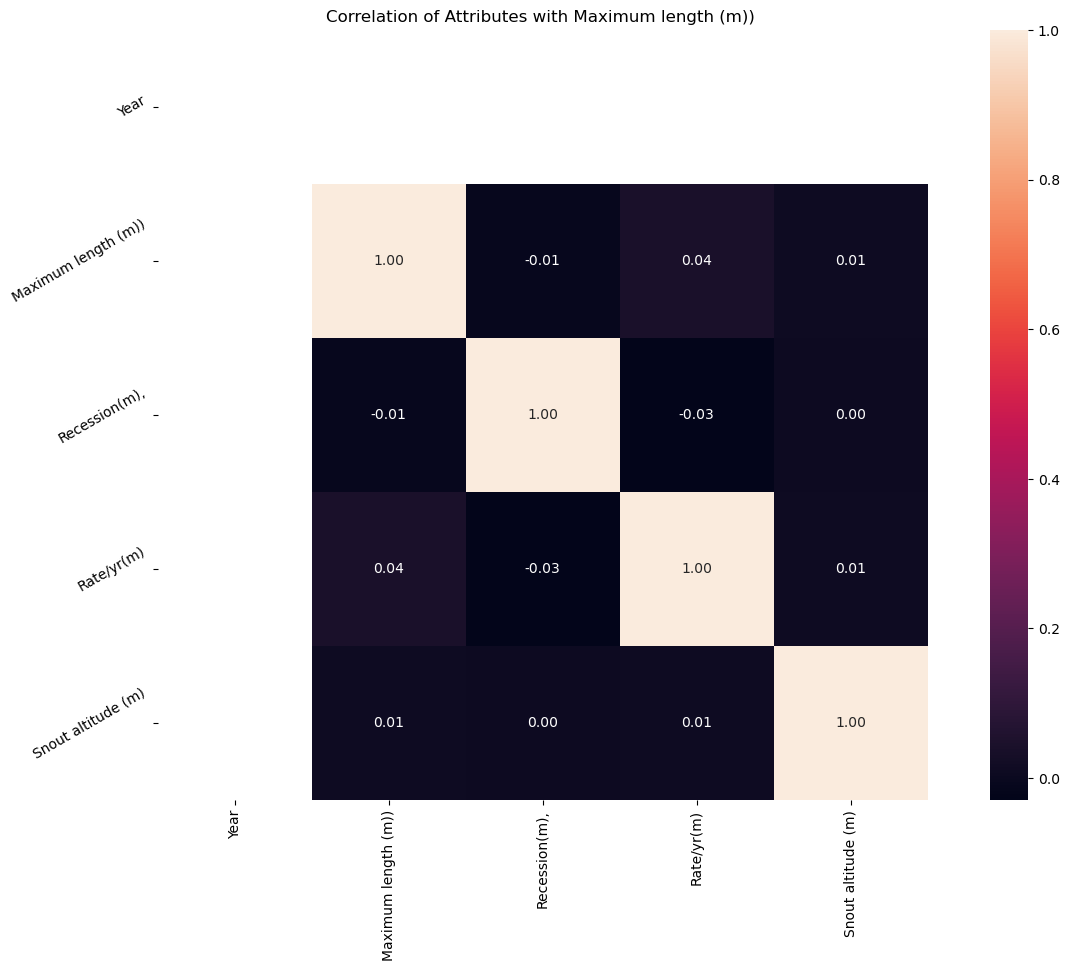

In [14]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with Maximum length (m)) ')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [15]:
df.isnull().sum()

Year                   0
Maximum length (m))    0
Recession(m),          0
Rate/yr(m)             0
Snout altitude (m)     0
dtype: int64

In [16]:
df.describe()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
count,"1,765.0000","1,765.0000","1,765.0000","1,765.0000","1,765.0000"
mean,"2,011.0000","17,543.7405",221.6147,27.4510,"3,531.6448"
std,0.0000,294.4690,125.9925,8.6016,20.5088
min,"2,011.0000","17,035.0000",0.0000,13.0000,"3,496.0000"
25%,"2,011.0000","17,291.0000",115.0000,20.0000,"3,514.0000"
50%,"2,011.0000","17,528.0000",217.0000,27.0000,"3,532.0000"
75%,"2,011.0000","17,802.0000",330.0000,35.0000,"3,549.0000"
max,"2,011.0000","18,067.0000",439.0000,42.0000,"3,567.0000"


In [17]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    print(df[var].value_counts() / np.float(len(df)))
    print()

2011   1.0000
Name: Year, dtype: float64

199   0.0079
68    0.0068
210   0.0062
202   0.0057
324   0.0057
       ...  
45    0.0006
410   0.0006
154   0.0006
264   0.0006
313   0.0006
Name: Recession(m),, Length: 433, dtype: float64

20   0.0402
42   0.0397
33   0.0385
27   0.0363
29   0.0357
16   0.0357
24   0.0357
23   0.0346
15   0.0346
38   0.0346
40   0.0340
32   0.0340
36   0.0340
21   0.0340
25   0.0340
18   0.0340
13   0.0329
17   0.0329
35   0.0329
30   0.0323
31   0.0323
22   0.0317
26   0.0317
28   0.0312
37   0.0312
34   0.0306
19   0.0289
14   0.0283
41   0.0272
39   0.0266
Name: Rate/yr(m), dtype: float64

3521   0.0204
3557   0.0198
3538   0.0198
3501   0.0187
3559   0.0187
        ...  
3523   0.0096
3554   0.0096
3525   0.0079
3562   0.0079
3496   0.0017
Name: Snout altitude (m), Length: 72, dtype: float64



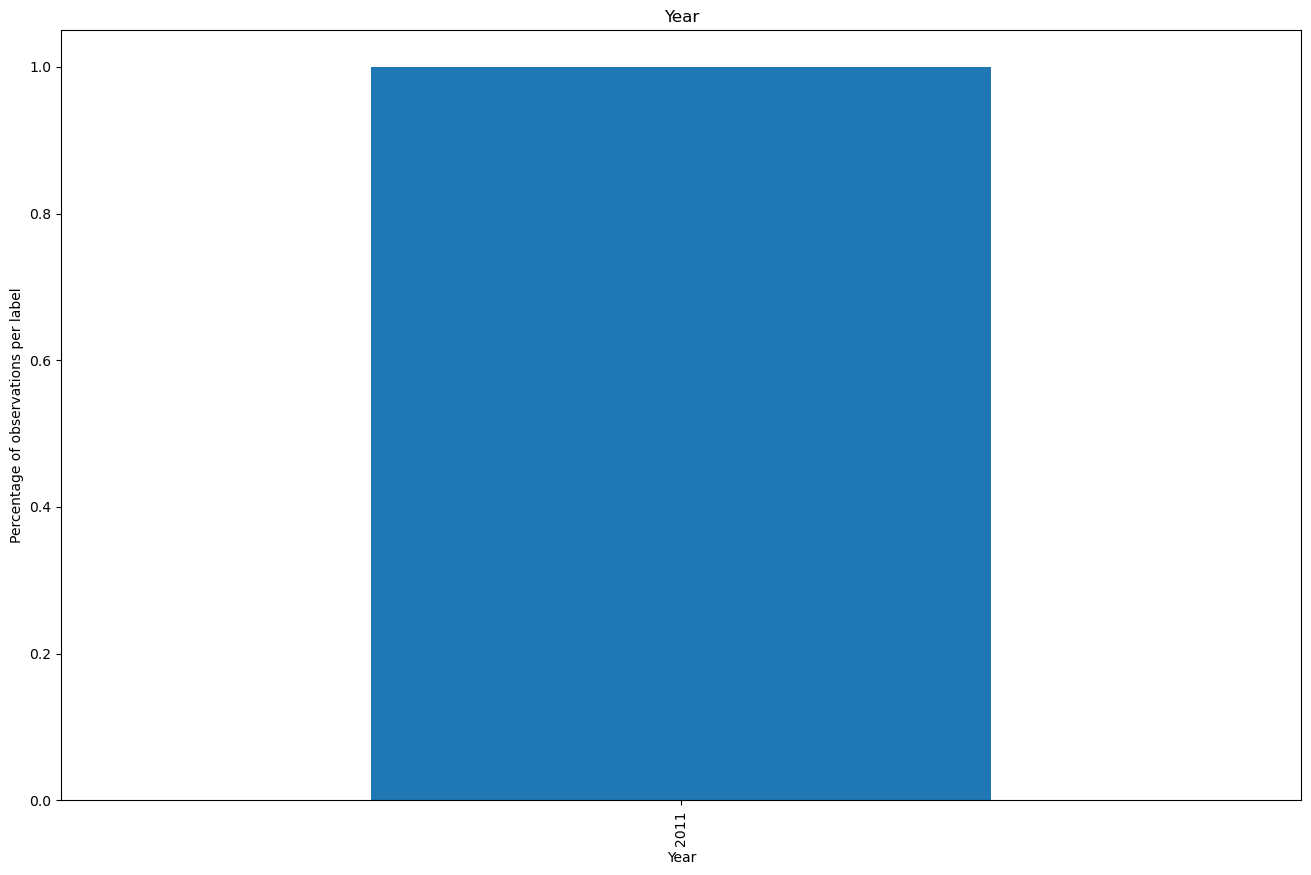

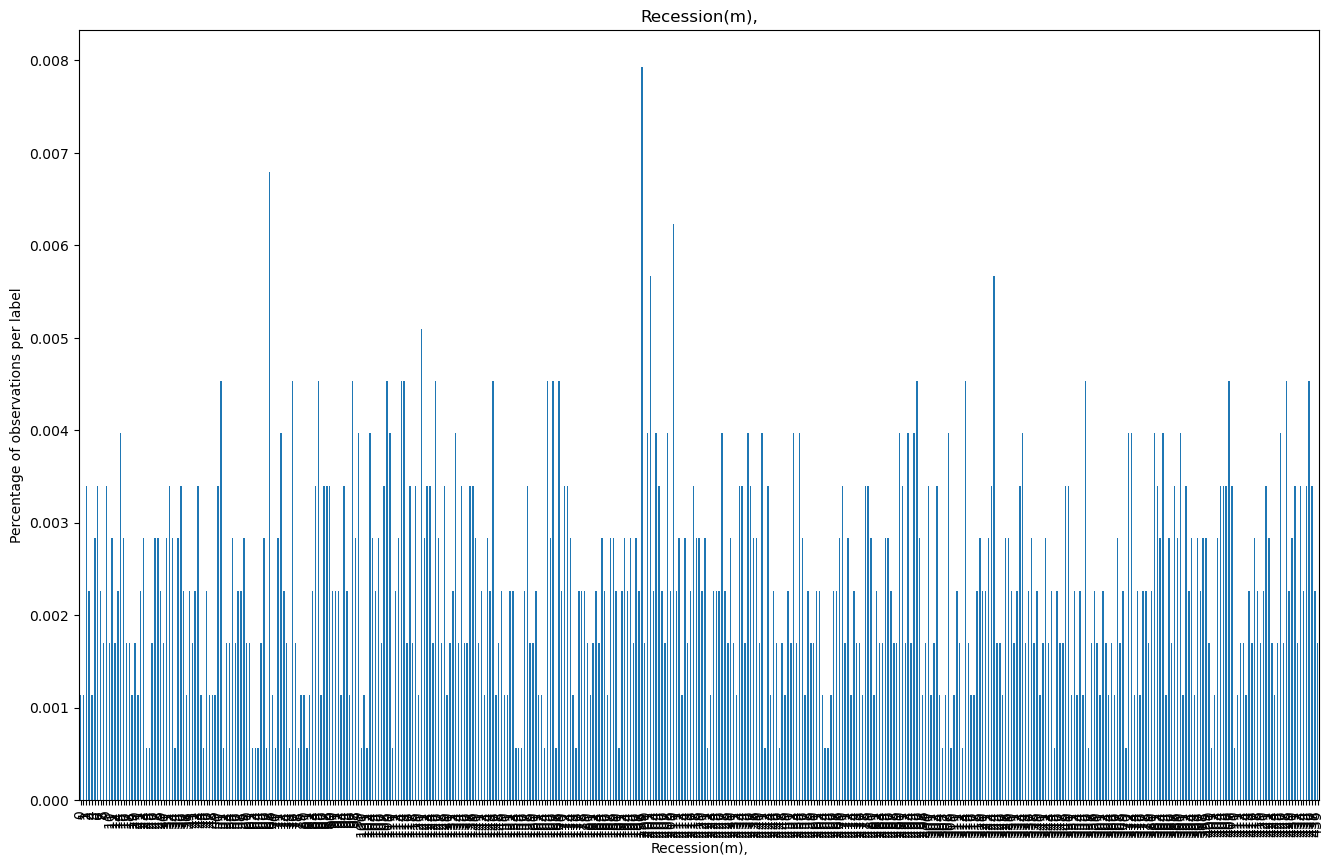

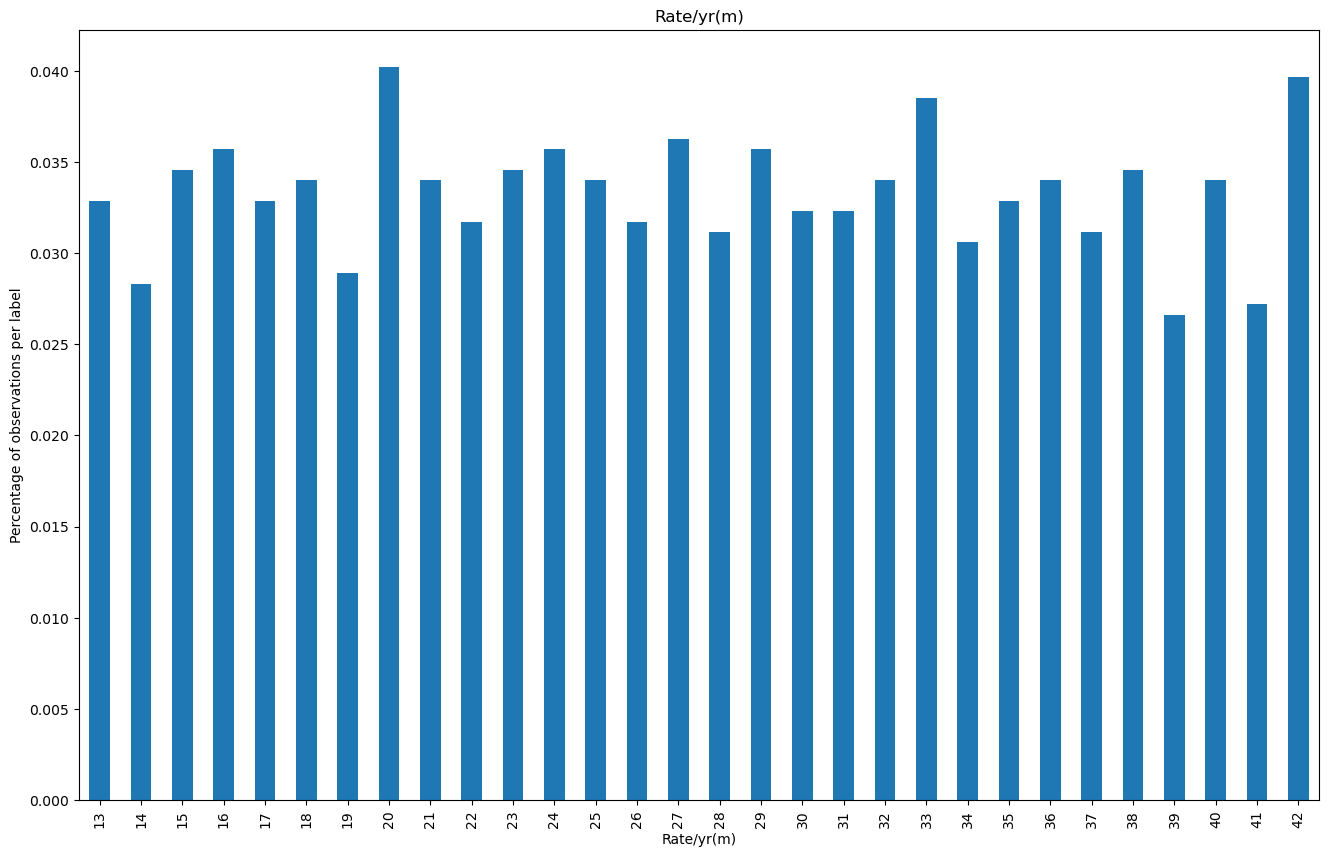

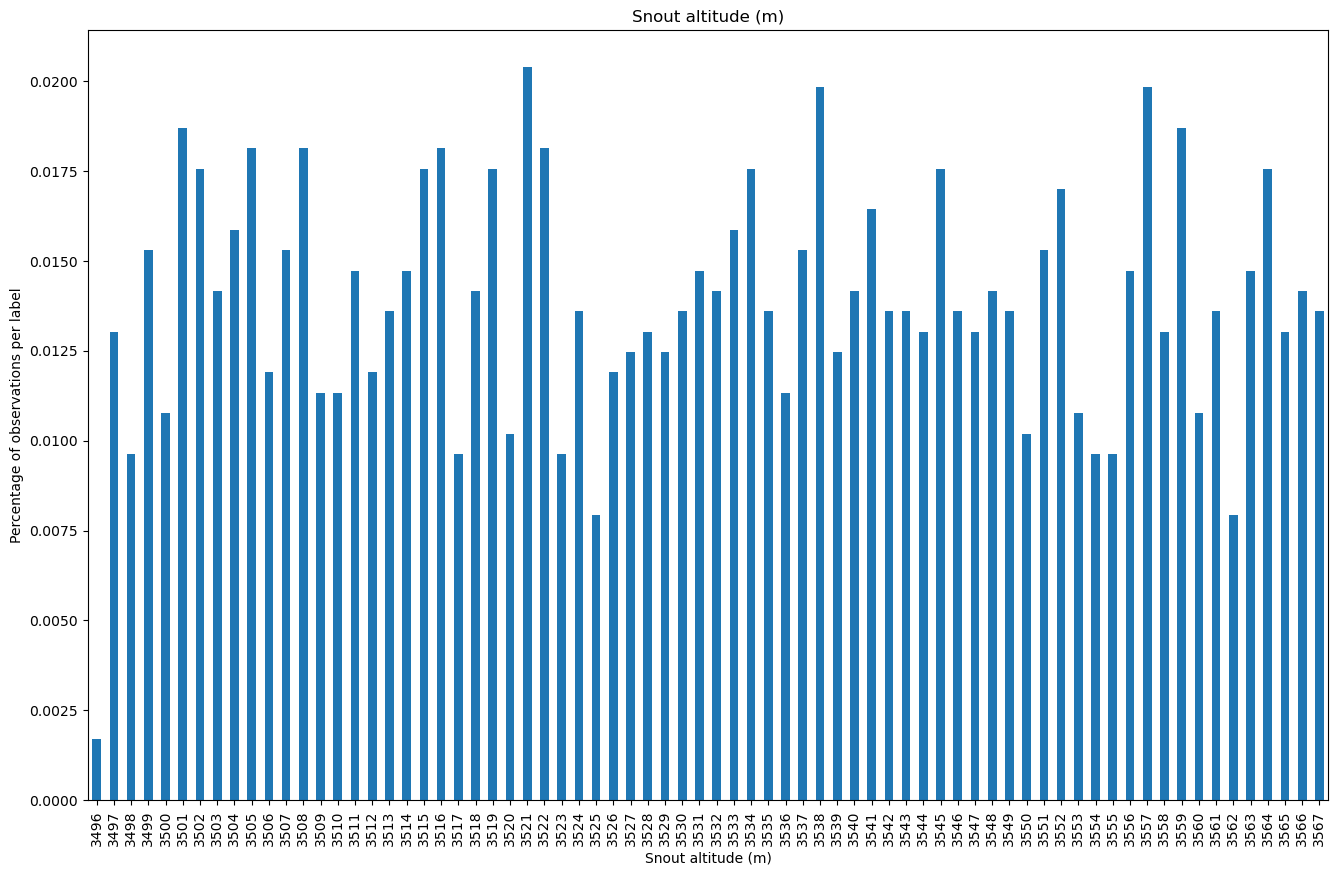

In [18]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()